### CONFIGURATION

In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
import numpy as np
import copy
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Hartwig imports
sys.path.append("/Users/peterpriestley/hmf/repos/scripts/analysisscripts") 
import analyseVCF as aVCF
import venn as vn

In [3]:
#VCF
#VCF_PATH = "/Users/peterpriestley/hmf/analyses/ensembleRuleTesting/"
VCF_PATH = "/Users/peterpriestley/hmf/analyses/161203_weirdKaryotype/"
# BED
#BED_PATH = "/Users/peterpriestley/hmf/analyses/giabTruthsets/"
#BED_FILE_NAME = "NA12878_GIAB_highconf_IllFB-IllGATKHC-CG-Ion-Solid_ALLCHROM_v3.2.2_highconf.bed"
BED_PATH = "/Users/peterpriestley/hmf/analyses/slices/"
#BED_FILE_NAME = "cosmicCancerCensus.bed" 
BED_FILE_NAME = "CPCT_Slicing.bed"
USE_BED = False
LOAD_FULL_FILE = True

# HEALTH CHECKS
HEALTH_CSV_PATH="/Users/peterpriestley/hmf/analyses/healthCheckAnalysis/"
HEALTH_CSV_FILENAME="healthCheckFile.csv"

In [4]:
# SPECIFY SAMPLES
VCF_SAMPLES=[]
for x in os.listdir(VCF_PATH):
    #if x[-10:] == "sliced.vcf":
        VCF_SAMPLES.append(x)
#VCF_SAMPLES = ['160903_HMFregCPCT_FR10302737_FR10304566_CPCT02070012.filtered_variants_snpEff_snpSift_Cosmicv76_GoNLv5_sliced.vcf']

<h3> LOAD VCF

In [5]:
#Load all VCF_SAMPLES to DF
df = pd.DataFrame({})
for VCF_SAMPLE in VCF_SAMPLES:
    patientIDStart = VCF_SAMPLE.find("CPCT0")
    VCF_FILE_NAME = VCF_SAMPLE
    SAMPLE_NAMES = {VCF_SAMPLE[patientIDStart:patientIDStart+12]+'R':'normal',VCF_SAMPLE[patientIDStart:patientIDStart+12]+'T':'tumor'}
    if USE_BED:
        bed = aVCF.loadBEDFile(BED_PATH,BED_FILE_NAME)
        df = pd.concat([df,aVCF.loadVaraintsFromVCF(VCF_PATH,VCF_FILE_NAME,SAMPLE_NAMES,VCF_SAMPLE[patientIDStart:patientIDStart+12],True,True,bed,LOAD_FULL_FILE)])
    else:
        df = pd.concat([df,aVCF.loadVaraintsFromVCF(VCF_PATH,VCF_FILE_NAME,SAMPLE_NAMES,VCF_SAMPLE[patientIDStart:patientIDStart+12],True)])

reading vcf file: 161123_HMFregCPCT_FR12244704_FR13275493_CPCT02060033.filtered_variants.vcf
reading VCF File line: 100000
reading VCF File line: 200000
reading VCF File line: 300000
reading VCF File line: 400000
reading VCF File line: 500000
reading VCF File line: 600000
reading VCF File line: 700000
reading VCF File line: 800000
reading VCF File line: 900000
reading VCF File line: 1000000
reading VCF File line: 1100000
reading VCF File line: 1200000
reading VCF File line: 1300000
reading VCF File line: 1400000
reading VCF File line: 1500000
reading VCF File line: 1600000
reading VCF File line: 1700000
reading VCF File line: 1800000
reading VCF File line: 1900000
reading VCF File line: 2000000
reading VCF File line: 2100000
reading VCF File line: 2200000
reading VCF File line: 2300000
reading VCF File line: 2400000
reading VCF File line: 2500000
reading VCF File line: 2600000
reading VCF File line: 2700000
reading VCF File line: 2800000
reading VCF File line: 2900000
reading VCF File 

In [6]:
#LOAD HEALTH_CHECKS
hc = pd.read_csv(HEALTH_CSV_PATH + HEALTH_CSV_FILENAME)
hc = hc[['SAMPLE','TUMOR_PERCENTAGE','TUMOR_TYPE','PIPELINE_VERSION']]
hc = hc[hc['SAMPLE'].str[12]=="T"]   # only tumor rows
hc['SAMPLE']=hc['SAMPLE'].str[:12]
hc = hc.set_index(['SAMPLE'])
df = pd.merge(df,hc,how='left', left_on='patientName',right_index=True)
df.fillna("Unknown", inplace=True)

<h3> High Level Stats

### LOH variants

In [47]:
pd.pivot_table(df[(df.normalSGT<>"")&(df.normalSGT<>df.tumorSGT)],\
               values='pos', index=['chromPos','patientName','annGene','normalSGT','tumorSGT'], columns=['consensus'], aggfunc='count',margins=True).fillna("")

consensus                                            False True   All
chromPos     patientName  annGene normalSGT tumorSGT                 
10:89720633  CPCT02040035 PTEN    0/1                    1        1.0
             CPCT02050048 PTEN    0/1                    1        1.0
             CPCT02060018 PTEN    0/1                    1        1.0
11:534242    CPCT02010393 HRAS    0/1       1/1               1   1.0
13:32914236  CPCT02020357 BRCA2   0/1                    1        1.0
14:105246325 CPCT02010393 AKT1    0/1       1/1          1        1.0
14:105246407 CPCT02160003 AKT1    0/1       1/1          1        1.0
14:105246565 CPCT02160003 AKT1    0/1                    1        1.0
14:105258892 CPCT02010393 AKT1    0/1                    1        1.0
17:37868189  CPCT02020293 ERBB2   0/1                    1        1.0
17:37884037  CPCT02010393 ERBB2   0/1                    1        1.0
17:41197709  CPCT02020293 BRCA1   0/1                    1        1.0
17:41223094  CPCT02010393 BRCA1   0/1                    1        1.0
             CPCT02160003 BRCA1   0/1                    1        1.0
17:41234470  CPCT02010393 BRCA1   0/1                    1        1.0
17:41244435  CPCT02010393 BRCA1   0/1                    1        1.0
17:41244936  CPCT02010393 BRCA1   0/1                    1        1.0
17:41245237  CPCT02010393 BRCA1   0/1                    1        1.0
17:41245466  CPCT02010393 BRCA1   0/1                    1        1.0
17:41246481  CPCT02010393 BRCA1   0/1       1/1               1   1.0
17:7578645   CPCT02010393 TP53    0/1                    1        1.0
2:212578379  CPCT02010394 ERBB4   0/1       1/1          1        1.0
             CPCT02140015 ERBB4   0/1       1/1          1        1.0
3:10183444   CPCT02020293 VHL     0/1                    1        1.0
4:1795557    CPCT02010325 FGFR3   1/1                    1        1.0
             CPCT02110006 FGFR3   1/1                    1        1.0
             CPCT02160002 FGFR3   1/1                    1        1.0
4:1806012    CPCT02060019 FGFR3   0/1                    1        1.0
4:1808004    CPCT02010375 FGFR3   0/1                    1        1.0
4:1808006    CPCT02010375 FGFR3   0/1                    1        1.0
4:1808010    CPCT02010375 FGFR3   0/1                    1        1.0
All                                                     29    2  31.0

### HIGH and MODERATE impact NON-missense

In [44]:
pd.pivot_table(df[((df['annWorstImpact']=='MODERATE')|(df['annWorstImpact']=='HIGH'))&(~df.annAllEffects.str.contains("missense"))&(df.normalSGT=="")],\
               values='pos', index=['chromPos','patientName','annGene','annWorstEffect','annWorstImpact','ref','normalallele'], columns=['consensus'], aggfunc='count',margins=True).fillna("")

,,,,,,consensus,False,All
chromPos,patientName,annGene,annWorstEffect,annWorstImpact,ref,normalallele,,
10:89692784,CPCT02140013,PTEN,disruptive_inframe_insertion,MODERATE,T,,1.0,1.0
10:89717731,CPCT02060015,PTEN,frameshift_variant,HIGH,T,,1.0,1.0
10:89720741,CPCT02140015,PTEN,stop_gained,HIGH,C,,1.0,1.0
10:89720798,CPCT02160001,PTEN,frameshift_variant,HIGH,GTACT,,1.0,1.0
16:68856020,CPCT02160001,CDH1,stop_gained,HIGH,C,,1.0,1.0
17:7573976,CPCT02060019,TP53,stop_gained,HIGH,T,,1.0,1.0
17:7576851,CPCT02140015,TP53,splice_donor_variant&intron_variant,HIGH,A,,1.0,1.0
17:7576855,CPCT02010397,TP53,stop_gained&splice_region_variant,HIGH,G,,1.0,1.0
17:7577085,CPCT02030261,TP53,stop_gained,HIGH,C,,1.0,1.0


### Missense

In [33]:
pd.pivot_table(df[(df.annAllEffects.str.contains("missense"))&(df.normalSGT=="")],\
               values='pos', index=['chromPos','patientName','annGene','normalSGT','tumorSGT'], columns=['consensus'], aggfunc='count',margins=True).fillna("")

,,,,consensus,False,All
chromPos,patientName,annGene,normalSGT,tumorSGT,,
10:89624305,CPCT02110007,PTEN,,0/1,1.0,1.0
10:89720677,CPCT02060015,PTEN,,0/1,1.0,1.0
12:25398284,CPCT02110006,KRAS,,0/1,1.0,1.0
13:32910968,CPCT02030261,BRCA2,,0/1,1.0,1.0
13:49033926,CPCT02020357,RB1,,0/1,1.0,1.0
16:68842328,CPCT02050048,CDH1,,0/1,1.0,1.0
17:37881000,CPCT02060019,ERBB2,,0/1,1.0,1.0
17:7577536,CPCT02110006,TP53,,0/1,1.0,1.0
17:7577538,CPCT02010390,TP53,,0/1,1.0,1.0


### SUMMARY OF TYPE

In [98]:
pd.pivot_table(df[(df['normalSGT']=="0/1")&((df['tumorSGT']=="1/1")|(df['tumorSGT']=="0/1")|(df['tumorSGT']==""))], values='pos', index=['chrom'], columns=['tumorSGT'], aggfunc='count').fillna("")

tumorSGT,,0/1,1/1
chrom,,,
1,86378,40234,81810
10,61239,14453,57115
11,57151,8030,62063
12,55648,11603,52114
13,41963,22886,34980
14,34622,20278,30601
15,36062,10262,28946
16,37477,13817,34648
17,33205,10523,31698


<h3> Allelic Depth

In [87]:
len(dftemp)

1186932

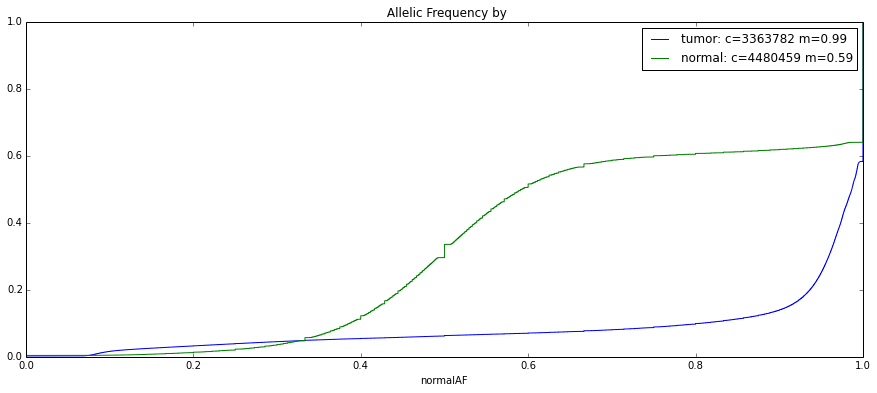

In [99]:
dftemp = df[(df['normalSGT']=="0/1")]#&(df['tumorSGT']<>"1/1")]
#Alllele Freq By Caller
for columnName in list(dftemp):
    if columnName.endswith('AF'):
        ser = dftemp[dftemp[columnName] != ''][columnName]
        ser = ser.sort_values()
        #ser[len(ser)] = ser.iloc[-1]
        cum_dist = np.linspace(0.,1.,len(ser))
        ser_cdf = pd.Series(cum_dist, index=ser,name=columnName[:-2]+": c="+str(ser.count())+" m="+str(round(ser.median(),2)))
        ser_cdf.plot(drawstyle='steps',legend=True,title=" Allelic Frequency by ",figsize=[15,6])

### SCRATCH

In [53]:
df[(df.patientName=='CPCT02010393')&(df.chrom=='17')]

,chrom,pos,chromPos,chromFrac,id,ref,vennSegment,numCallers,variantType,variantSubType,filter,bedRegion,inDBSNP,inCOSMIC,annGene,annWorstImpact,annWorstEffect,annAllEffects,consensus,tumorallele,tumorAF,tumorDP,tumorQS,tumorSGT,tumorindelDiff,normalallele,normalAF,normalDP,normalQS,normalSGT,normalindelDiff,patientName,TUMOR_PERCENTAGE,TUMOR_TYPE,PIPELINE_VERSION
53,17,7578115,17:7578115,17.093332,rs1625895,T,test,2,SNP,,PASS,TP53,True,False,TP53,LOW,sequence_feature,sequence_feature|sequence_feature|sequence_fea...,False,C,0.0866142,127,-1,0/1,,C,0.435897,39,-1,0/1,,CPCT02010393,40,Melanoma,v1.9
54,17,7578212,17:7578212,17.093333,COSM10654,G,test,1,SNP,,PASS,TP53,False,True,TP53,HIGH,stop_gained,stop_gained|stop_gained|stop_gained|stop_gaine...,False,A,0.838983,118,-1,0/1,,,,,,,,CPCT02010393,40,Melanoma,v1.9
55,17,7578645,17:7578645,17.093339,rs2909430,C,test,1,SNP,,PASS,TP53,True,False,TP53,LOW,sequence_feature,sequence_feature|sequence_feature|sequence_fea...,False,,,,,,,T,0.548387,31,-1,0/1,,CPCT02010393,40,Melanoma,v1.9
56,17,7579472,17:7579472,17.093349,rs1042522;COSM3766190,G,test,2,SNP,,PASS,TP53,True,True,TP53,MODERATE,missense_variant,missense_variant|missense_variant|missense_var...,True,C,0.0915033,153,-1,0/1,,C,0.40625,32,-1,0/1,,CPCT02010393,40,Melanoma,v1.9
57,17,37884037,17:37884037,17.466580,rs61552325;COSM5436892,C,test,1,SNP,,PASS,ERBB2,True,True,ERBB2,MODERATE,missense_variant,missense_variant|missense_variant|missense_var...,False,,,,,,,G,0.481481,27,-1,0/1,,CPCT02010393,40,Melanoma,v1.9
58,17,38556770,17:38556770,17.474865,rs471692,T,test,2,SNP,,PASS,TOP2A,True,False,TOP2A,LOW,sequence_feature,sequence_feature|intron_variant,False,C,1,185,-1,1/1,,C,1,39,-1,1/1,,CPCT02010393,40,Melanoma,v1.9
59,17,41223094,17:41223094,17.507704,rs1799966;COSM3755559,T,test,1,SNP,,PASS,BRCA1,True,True,BRCA1,MODERATE,missense_variant,missense_variant|missense_variant|missense_var...,False,,,,,,,C,0.522727,44,-1,0/1,,CPCT02010393,40,Melanoma,v1.9
60,17,41234470,17:41234470,17.507844,rs1060915;COSM4416375,A,test,1,SNP,,PASS,BRCA1,True,True,BRCA1,LOW,synonymous_variant,synonymous_variant|synonymous_variant|synonymo...,False,,,,,,,G,0.566667,30,-1,0/1,,CPCT02010393,40,Melanoma,v1.9
61,17,41244000,17:41244000,17.507961,rs16942;COSM148277,T,test,2,SNP,,PASS,BRCA1,True,True,BRCA1,MODERATE,missense_variant,missense_variant|missense_variant|missense_var...,True,C,0.0779221,154,-1,0/1,,C,0.486486,37,-1,0/1,,CPCT02010393,40,Melanoma,v1.9
62,17,41244435,17:41244435,17.507966,rs16941;COSM3755563,T,test,1,SNP,,PASS,BRCA1,True,True,BRCA1,MODERATE,missense_variant,missense_variant|missense_variant|missense_var...,False,,,,,,,C,0.577778,45,-1,0/1,,CPCT02010393,40,Melanoma,v1.9
